# iterative_sim benchmark results on Piz Daint/Castor

In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def parse_file_size(s, unit='MB'):
    match = re.search(r'^\s*(\d+|\d+\.\d+) ([KMGT]B)\s*$', s)
    norm = dict(KB=1000., MB=1., GB=1./1000, TB=1./1000000)[unit]
    file_size_to_mb = dict(KB=lambda fs: float(fs)/1000.   *norm,
                           MB=lambda fs: float(fs)         *norm,
                           GB=lambda fs: float(fs)*1000.   *norm,
                           TB=lambda fs: float(fs)*1000000.*norm,)
    return file_size_to_mb[match.group(2)](match.group(1))

In [3]:
def parse_time(t):
    match = re.search(r'^\s*(\d+)m\s*(\d+|\d+\.\d+)s\s*$', t)
    return float(match.group(1))*60. + float(match.group(2))

In [4]:
def parse_all(s):
    try:
        return parse_file_size(s)
    except:
        pass
    try:
        return parse_time(s)
    except:
        pass
    try:
        return int(s)
    except:
        pass
    raise RuntimeError("Parser Failure")

In [5]:
parsed_df = pd.read_csv('iterative_sim_plain.csv').rename(columns=lambda s: s.strip(' ')).applymap(parse_all)
parsed_df['aggregate stage bandwidth [MB/s]'] =    parsed_df['aggregate payload']/parsed_df['stage time (SLURM step)']
parsed_df['dvc commit bandwidth [MB/s]'] =         parsed_df['aggregate payload']/parsed_df['dvc commit time (SLURM step)']
parsed_df['dvc push bandwidth to Castor [MB/s]'] = parsed_df['aggregate payload']/parsed_df['dvc push time to Castor (SLURM step)']
parsed_df

,per-rank file count,individual file size,per-rank payload,aggregate payload,stage time (SLURM step),dvc commit time (SLURM step),dvc push time to Castor (SLURM step),aggregate stage bandwidth [MB/s],dvc commit bandwidth [MB/s],dvc push bandwidth to Castor [MB/s]
0,1,1000.0,1000.0,16000.0,27.052,46.797,153.804,591.453497,341.902259,104.028504
1,1,2000.0,2000.0,32000.0,31.342,79.278,242.548,1020.994193,403.642877,131.932648
2,1,4000.0,4000.0,64000.0,82.411,161.182,463.655,776.595357,397.066670,138.033667
3,1,8000.0,8000.0,128000.0,120.840,330.745,865.279,1059.251903,387.005095,147.929165
4,1,16000.0,16000.0,256000.0,239.262,674.833,1597.984,1069.956784,379.353114,160.201854
5,1,32000.0,32000.0,512000.0,462.820,1595.141,3334.079,1106.261614,320.974760,153.565647
6,1,64000.0,64000.0,1024000.0,935.199,2464.529,6626.116,1094.954122,415.495212,154.540005
7,1000,1.0,1000.0,16000.0,23.444,1056.499,483.508,682.477393,15.144359,33.091490
8,1000,2.0,2000.0,32000.0,33.024,1192.038,542.840,968.992248,26.844782,58.949230
9,1000,4.0,4000.0,64000.0,61.768,1353.451,812.501,1036.135216,47.286529,78.769134


In [6]:
encfs_df = pd.read_csv('iterative_sim_encfs.csv').rename(columns=lambda s: s.strip(' ')).applymap(parse_all)
encfs_df['aggregate stage bandwidth [MB/s]'] =    encfs_df['aggregate payload']/encfs_df['stage time (SLURM step)']
encfs_df

,per-rank file count,individual file size,per-rank payload,aggregate payload,stage time (SLURM step),aggregate stage bandwidth [MB/s]
0,1,1000.0,1000.0,16000.0,39.529,404.766121
1,1,2000.0,2000.0,32000.0,77.725,411.707945
2,1,4000.0,4000.0,64000.0,148.160,431.965443
3,1,8000.0,8000.0,128000.0,297.152,430.755977
4,1,16000.0,16000.0,256000.0,578.297,442.679108
5,1,32000.0,32000.0,512000.0,1127.857,453.958259
6,1,64000.0,64000.0,1024000.0,2247.673,455.582284
7,1000,1.0,1000.0,16000.0,55.533,288.116975
8,1000,2.0,2000.0,32000.0,75.242,425.294383
9,1000,4.0,4000.0,64000.0,169.697,377.142790


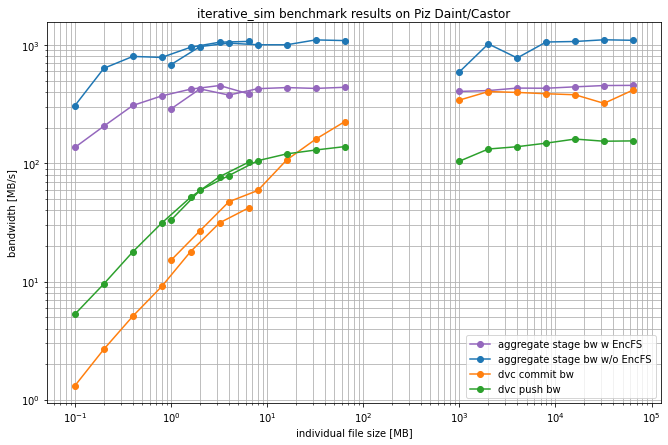

In [7]:
plt.figure(figsize=(11, 7))
color_opts = list(plt.rcParams["axes.prop_cycle"])
for file_count, group_df in encfs_df.groupby('per-rank file count'):
    if file_count == 1:
        plt.loglog('individual file size', 'aggregate stage bandwidth [MB/s]',   'o-', data=group_df, **color_opts[4], label='aggregate stage bw w EncFS')
    else:
        plt.loglog('individual file size', 'aggregate stage bandwidth [MB/s]',   'o-', data=group_df, **color_opts[4], label='_hidden_')

for file_count, group_df in parsed_df.groupby('per-rank file count'):
    if file_count == 1:
        plt.loglog('individual file size', 'aggregate stage bandwidth [MB/s]',   'o-', data=group_df, **color_opts[0], label='aggregate stage bw w/o EncFS')
        plt.loglog('individual file size', 'dvc commit bandwidth [MB/s]',        'o-', data=group_df, **color_opts[1], label='dvc commit bw')
        plt.loglog('individual file size', 'dvc push bandwidth to Castor [MB/s]','o-', data=group_df, **color_opts[2], label='dvc push bw')
    else:
        plt.loglog('individual file size', 'aggregate stage bandwidth [MB/s]',   'o-', data=group_df, **color_opts[0], label='_hidden_')
        plt.loglog('individual file size', 'dvc commit bandwidth [MB/s]',        'o-', data=group_df, **color_opts[1], label='_hidden_')
        plt.loglog('individual file size', 'dvc push bandwidth to Castor [MB/s]','o-', data=group_df, **color_opts[2], label='_hidden_')

plt.xlabel('individual file size [MB]')
plt.ylabel('bandwidth [MB/s]')
plt.title('iterative_sim benchmark results on Piz Daint/Castor')
plt.legend()
plt.grid(visible=True, which='both')
plt.savefig('iterative_sim_results.svg', dpi=300)
plt.show()
